In [55]:
from classiq import *
from classiq import ExecutionSession
import numpy as np

In [86]:
# Input t parameters

t_start = 0
t_end = 1
step_size = 20

# Prepare ancillas with Taylor coefficients
@qfunc
def prepare_anc_q(anc_q:QArray[QBit], t: CReal):
    t = t_start
    amps = np.array([1.0, t, (t**2) / 2, (t**3) / 6]) # taylor coefficients
    amps = amps / np.linalg.norm(amps) #normalize
    inplace_prepare_state(probabilities = amps,bound = 0.01,target=anc_q) #prepare ancilla register

    return(anc_q)

# main function
@qfunc
def main(work_q: Output[QBit], anc_q: Output[QArray[QBit]], t: CReal) -> None: # Define ragisters & variables
    allocate(1, work_q) #allocate qubits
    allocate(2,anc_q)
    H(work_q)
    prepare_anc_q(anc_q,t) # call ancilla preparation function
    # Need Control logic for Step 3:

    
    invert(lambda: prepare_anc_q(anc_q, t)) # Invert ancilla state preparation
    
qprog = synthesize(main) # Synthesize circuit
# Create a list of times to measure the circuit over
times = np.linspace(t_start, t_end, step_size)
params_list = [{"t": float(t)} for t in times]
    
# execute in a session
with ExecutionSession(qprog) as session:
    batch_results = session.batch_sample(params_list)
# Show circuit
show(qprog)



Quantum program link: https://platform.classiq.io/circuit/3ALjT7FrXFJBvifK033SSeNY9R4


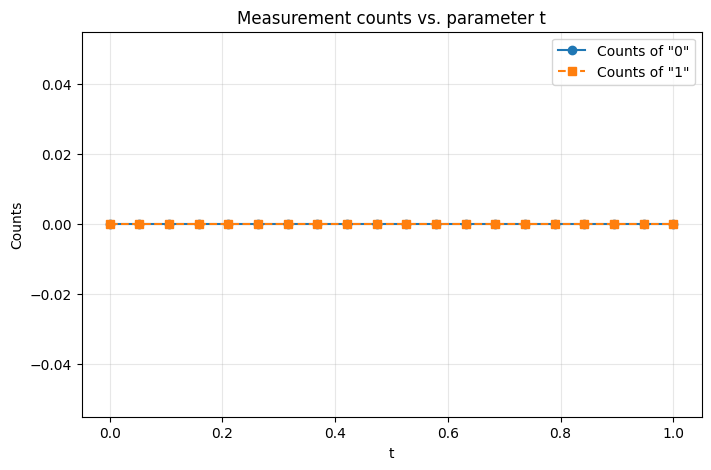

In [87]:
# Show graph (nothing as of right now)

# Extract counts for the state
import matplotlib.pyplot as plt
counts_0 = [res.counts.get("0", 0) for res in batch_results]
counts_1 = [res.counts.get("1", 0) for res in batch_results]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(times, counts_0, label='Counts of "0"', marker='o')
plt.plot(times, counts_1, label='Counts of "1"', marker='s', linestyle='--')

plt.xlabel("t")
plt.ylabel("Counts")
plt.title("Measurement counts vs. parameter t")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [81]:
for i in batch_results:
    print(i)

vendor_format_result={} counts={'001': 1056, '000': 992} counts_lsb_right=True probabilities={} parsed_states={'001': {'work_q': 1, 'anc_q': [0, 0]}, '000': {'work_q': 0, 'anc_q': [0, 0]}} histogram=None output_qubits_map={'work_q': (0,), 'anc_q': (1, 2)} state_vector=None parsed_state_vector_states=None physical_qubits_map={'work_q': (0,), 'anc_q': (1, 2)} num_shots=2048 output_type_map={'work_q': RegisterQuantumType(quantum_types=QuantumBit(source_ref=None, back_ref=None, kind='qbit'), size=1), 'anc_q': RegisterQuantumType(quantum_types=QuantumBitvector(source_ref=None, back_ref=None, element_type=QuantumBit(source_ref=None, back_ref=None, kind='qbit'), kind='qvec', length=Expression(source_ref=None, back_ref=None, expr='2')), size=2)} warnings=[]
vendor_format_result={} counts={'000': 1006, '001': 1042} counts_lsb_right=True probabilities={} parsed_states={'000': {'work_q': 0, 'anc_q': [0, 0]}, '001': {'work_q': 1, 'anc_q': [0, 0]}} histogram=None output_qubits_map={'work_q': (0,), 